# Analyse de l'indice de la varicelle

In [30]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import isoweek


In [11]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

In [12]:
data_file = "inc-7-PAY.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url,data_file)

In [14]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202518          7   5795     2714    8876       9           4   
1     202517          7   6323     3436    9210       9           5   
2     202516          7   6151     3193    9109       9           5   
3     202515          7   5557     3262    7852       8           5   
4     202514          7   4984     2858    7110       7           4   
5     202513          7   5964     3608    8320       9           5   
6     202512          7   3855     1995    5715       6           3   
7     202511          7   5878     2747    9009       9           4   
8     202510          7   2921     1421    4421       4           2   
9     202509          7   3381     1468    5294       5           2   
10    202508          7   2835     1286    4384       4           2   
11    202507          7   4502     2382    6622       7           4   
12    202506          7   3455     1958    4952       5           3   
13    202505          7   2087     1056    3118       3           1   
14    202504          7   6895     4466    9324      10           6   
15    202503          7   2462     1161    3763       4           2   
16    202502          7   5966     2757    9175       9           4   
17    202501          7   6059     2451    9667       9           4   
18    202452          7   4356     1776    6936       7           3   
19    202451          7   4670     2239    7101       7           3   
20    202450          7   7363     4438   10288      11           7   
21    202449          7   6077     3631    8523       9           5   
22    202448          7   4189     1454    6924       6           2   
23    202447          7   1931      726    3136       3           1   
24    202446          7   2260      863    3657       3           1   
25    202445          7   2713     1216    4210       4           2   
26    202444          7   2135      676    3594       3           1   
27    202443          7   2124      641    3607       3           1   
28    202442          7   2621     1246    3996       4           2   
29    202441          7   2035      381    3689       3           1   
...      ...        ...    ...      ...     ...     ...         ...   
1766  199126          7  17608    11304   23912      31          20   
1767  199125          7  16169    10700   21638      28          18   
1768  199124          7  16171    10071   22271      28          17   
1769  199123          7  11947     7671   16223      21          13   
1770  199122          7  15452     9953   20951      27          17   
1771  199121          7  14903     8975   20831      26          16   
1772  199120          7  19053    12742   25364      34          23   
1773  199119          7  16739    11246   22232      29          19   
1774  199118          7  21385    13882   28888      38          25   
1775  199117          7  13462     8877   18047      24          16   
1776  199116          7  14857    10068   19646      26          18   
1777  199115          7  13975     9781   18169      25          18   
1778  199114          7  12265     7684   16846      22          14   
1779  199113          7   9567     6041   13093      17          11   
1780  199112          7  10864     7331   14397      19          13   
1781  199111          7  15574    11184   19964      27          19   
1782  199110          7  16643    11372   21914      29          20   
1783  199109          7  13741     8780   18702      24          15   
1784  199108          7  13289     8813   17765      23          15   
1785  199107          7  12337     8077   16597      22          15   
1786  199106          7  10877     7013   14741      19          12   
1787  199105          7  10442     6544   14340      18          11   
1788  199104          7   7913     4563   11263      14           8   
1789  199103          7  15387    10484   20290      27          18   
1790  199102          7  16277  

In [15]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [17]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

In [18]:
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202518          7   5795     2714    8876       9           4   
1     202517          7   6323     3436    9210       9           5   
2     202516          7   6151     3193    9109       9           5   
3     202515          7   5557     3262    7852       8           5   
4     202514          7   4984     2858    7110       7           4   
5     202513          7   5964     3608    8320       9           5   
6     202512          7   3855     1995    5715       6           3   
7     202511          7   5878     2747    9009       9           4   
8     202510          7   2921     1421    4421       4           2   
9     202509          7   3381     1468    5294       5           2   
10    202508          7   2835     1286    4384       4           2   
11    202507          7   4502     2382    6622       7           4   
12    202506          7   3455     1958    4952       5           3   
13    202505          7   2087     1056    3118       3           1   
14    202504          7   6895     4466    9324      10           6   
15    202503          7   2462     1161    3763       4           2   
16    202502          7   5966     2757    9175       9           4   
17    202501          7   6059     2451    9667       9           4   
18    202452          7   4356     1776    6936       7           3   
19    202451          7   4670     2239    7101       7           3   
20    202450          7   7363     4438   10288      11           7   
21    202449          7   6077     3631    8523       9           5   
22    202448          7   4189     1454    6924       6           2   
23    202447          7   1931      726    3136       3           1   
24    202446          7   2260      863    3657       3           1   
25    202445          7   2713     1216    4210       4           2   
26    202444          7   2135      676    3594       3           1   
27    202443          7   2124      641    3607       3           1   
28    202442          7   2621     1246    3996       4           2   
29    202441          7   2035      381    3689       3           1   
...      ...        ...    ...      ...     ...     ...         ...   
1766  199126          7  17608    11304   23912      31          20   
1767  199125          7  16169    10700   21638      28          18   
1768  199124          7  16171    10071   22271      28          17   
1769  199123          7  11947     7671   16223      21          13   
1770  199122          7  15452     9953   20951      27          17   
1771  199121          7  14903     8975   20831      26          16   
1772  199120          7  19053    12742   25364      34          23   
1773  199119          7  16739    11246   22232      29          19   
1774  199118          7  21385    13882   28888      38          25   
1775  199117          7  13462     8877   18047      24          16   
1776  199116          7  14857    10068   19646      26          18   
1777  199115          7  13975     9781   18169      25          18   
1778  199114          7  12265     7684   16846      22          14   
1779  199113          7   9567     6041   13093      17          11   
1780  199112          7  10864     7331   14397      19          13   
1781  199111          7  15574    11184   19964      27          19   
1782  199110          7  16643    11372   21914      29          20   
1783  199109          7  13741     8780   18702      24          15   
1784  199108          7  13289     8813   17765      23          15   
1785  199107          7  12337     8077   16597      22          15   
1786  199106          7  10877     7013   14741      19          12   
1787  199105          7  10442     6544   14340      18          11   
1788  199104          7   7913     4563   11263      14           8   
1789  199103          7  15387    10484   20290      27          18   
1790  199102          7  16277  

In [19]:
sorted_data = raw_data.set_index('period').sort_index()

In [20]:
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2024-10-07/2024-10-13  202441          7   2035      381    3689       3   
2024-10-14/2024-10-20  202442          7   2621     1246    3996       4   
2024-10-21/2024-10-27  202443          7   2124      641    3607       3   
2024-10-28/2024-11-03  202444          7   2135      676    3594       3   
2024-11-04/2024-11-10  202445          7   2713     1216    4210       4   
2024-11-11/2024-11-17  202446          7   2260      863    3657       3   
2024-11-18/2024-11-24  202447          7   1931      726    3136       3   
2024-11-25/2024-12-01  202448          7   4189     1454    6924       6   
2024-12-02/2024-12-08  202449          7   6077     3631    8523       9   
2024-12-09/2024-12-15  202450          7   7363     4438   10288      11   
2024-12-16/2024-12-22  202451          7   4670     2239    7101       7   
2024-12-23/2024-12-29  202452          7   4356     1776    6936       7   
2024-12-30/2025-01-05  202501          7   6059     2451    9667       9   
2025-01-06/2025-01-12  202502          7   5966     2757    9175       9   
2025-01-13/2025-01-19  202503          7   2462     1161    3763       4   
2025-01-20/2025-01-26  202504          7   6895     4466    9324      10   
2025-01-27/2025-02-02  202505          7   2087     1056    3118       3   
2025-02-03/2025-02-09  202506          7   3455     1958    4952       5   
2025-02-10/2025-02-16  202507          7   4502     2382    6622       7   
2025-02-17/2025-02-23  202508          7   2835     1286    4384       4 

In [37]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    2025)]

In [38]:
first_sept_week

[Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN'),
 Period('1995-08-28/1995-09-03', 'W-SUN'),
 Period('1996-08-26/1996-09-01', 'W-SUN'),
 Period('1997-09-01/1997-09-07', 'W-SUN'),
 Period('1998-08-31/1998-09-06', 'W-SUN'),
 Period('1999-08-30/1999-09-05', 'W-SUN'),
 Period('2000-08-28/2000-09-03', 'W-SUN'),
 Period('2001-08-27/2001-09-02', 'W-SUN'),
 Period('2002-08-26/2002-09-01', 'W-SUN'),
 Period('2003-09-01/2003-09-07', 'W-SUN'),
 Period('2004-08-30/2004-09-05', 'W-SUN'),
 Period('2005-08-29/2005-09-04', 'W-SUN'),
 Period('2006-08-28/2006-09-03', 'W-SUN'),
 Period('2007-08-27/2007-09-02', 'W-SUN'),
 Period('2008-09-01/2008-09-07', 'W-SUN'),
 Period('2009-08-31/2009-09-06', 'W-SUN'),
 Period('2010-08-30/2010-09-05', 'W-SUN'),
 Period('2011-08-29/2011-09-04', 'W-SUN'),
 Period('2012-08-27/2012-09-02', 'W-SUN'),
 Period('2013-08-26/2013-09-01', 'W-SUN'),
 Period('20

In [39]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

In [40]:
yearly_incidence

1992    832939
1993    643387
1994    661409
1995    652478
1996    564901
1997    683434
1998    677775
1999    756456
2000    617597
2001    619041
2002    516689
2003    758363
2004    777388
2005    628464
2006    632833
2007    717352
2008    749478
2009    842373
2010    829911
2011    642368
2012    624573
2013    698332
2014    685769
2015    604382
2016    782114
2017    551041
2018    542312
2019    584066
2020    221186
2021    376290
2022    641397
2023    366227
2024    479258
dtype: int64

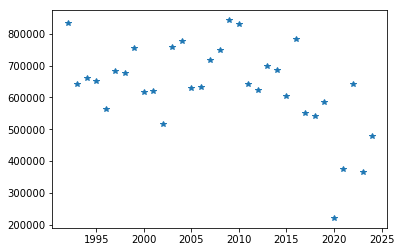

In [41]:
yearly_incidence.plot(style='*')

In [48]:
minimum = np.min(yearly_incidence)

In [50]:
minimum = yearly_incidence[yearly_incidence.eq(minimum)]

In [51]:
minimum 

2020    221186
dtype: int64

In [52]:
maximum = yearly_incidence[yearly_incidence.eq(np.max(yearly_incidence))]
maximum

2009    842373
dtype: int64